In [1]:
%matplotlib widget
import cv2
import numpy as np
from matplotlib import pyplot as plt

from ipywidgets import HBox, Textarea, interact

### Substract background

#### Calcualte median of image

In [2]:
#aligners
fileNameVideoA = "D:\\Matan\\20221218\\aligners53passive28cm\\C0511.MP4"
fileNameVideoF = "D:\\Matan\\20221217\\fronters53passive28cm\\C0505.MP4"

#Frames to skip for computing median
frameSkip = 1
startTimeSeconds = 1*60 + 20
endTimeSeconds = 2*60 + 30

video = cv2.VideoCapture(fileNameVideoF)


fps = video.get(cv2.CAP_PROP_FPS)
startFrame = startTimeSeconds*fps
endFrame = endTimeSeconds*fps

numberOfFrames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Init the stack for computing the median
medstack = []

keyFrames = np.arange(startFrame,endFrame,frameSkip)

for frameNum in keyFrames:
    video.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
    
    ret, img = video.read()
    
    if(ret): #if succesfffuly read an image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        medstack.append(gray)

medst = np.median(medstack,axis=0)    

#### Export file with background substracted

In [20]:
(1*60 + 20)*25

2000

In [7]:
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))


### Saving file with background substracted

In [8]:
outputFilename = 'output.avi'

In [9]:
def normFrame8bit(frame):
    #return a frame normed to 8bit grayscale
    
    #Normalize
    frame = frame-frame.min()
    frame = frame/frame.max()
    #Scale to 8 bits
    frame = np.uint8(frame*255)
    
    return frame

In [10]:
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(outputFilename, fourcc, fps, (width,height),0)

video.set(cv2.CAP_PROP_POS_FRAMES, startFrame)

ret = True
i = 0
#while(ret):
alpha = 1.5
beta = 20
while(i<1000):   
    ret, frame = video.read()
    
    if ret==True:  
        #frame = frame[:,:,0]#cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frameOut = (frame)/(medst+1)
        frameOut8bit = normFrame8bit(frameOut)
        #cv2.normalize(frameOut8bit, frameOut8bit, minIntensity, maxIntensity, cv2.NORM_MINMAX)
        frameOut8bitSatCont = cv2.convertScaleAbs(frameOut8bit, alpha=alpha, beta=beta)
        out.write(frameOut8bitSatCont)
    i+=1
out.release()

In [11]:
plt.hist(frameOut8bitSatCont.ravel())

(array([2.204300e+04, 1.516870e+05, 1.886224e+06, 1.274800e+04,
        6.140000e+02, 1.080000e+02, 4.800000e+01, 4.500000e+01,
        2.000000e+01, 6.300000e+01]),
 array([ 20. ,  43.5,  67. ,  90.5, 114. , 137.5, 161. , 184.5, 208. ,
        231.5, 255. ]),
 <BarContainer object of 10 artists>)

In [12]:
video.set(cv2.CAP_PROP_POS_FRAMES, 2000)
ret, img = video.read()
   
if ret==True:  
    #frame = frame[:,:,0]#cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/(medst+1)
    img = normFrame8bit(img)
    #cv2.normalize(frameOut8bit, frameOut8bit, minIntensity, maxIntensity, cv2.NORM_MINMAX)

    alpha = 2
    beta = 50
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    ax.imshow(img,cmap='gray')

NameError: name 'ax' is not defined

### Interactive thresholding

In [18]:
#frameRange= range(starting_point,frameCount,frame_step)
framNum = 100
@interact(frameNum = (startFrame,endFrame),a = (0,10.), b = (0,200.))
def backgroundAndContrast(frameNum, a, b):
    video.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
    ret, img = video.read()
    ax.clear()
    if ret==True:  
        #frame = frame[:,:,0]#cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img/(medst+1)
        img = normFrame8bit(img)
        
        alpha = 2
        beta = 50
        cv2.convertScaleAbs(img, img,alpha=a, beta=b)
        #ret, img = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)#cv2.THRESH_OTSU + cv2.THRESH_BINARY)
        
        ax.imshow(img,cmap='gray')
HBox([fig.canvas])

interactive(children=(FloatSlider(value=2875.0, description='frameNum', max=3750.0, min=2000.0), FloatSlider(v…

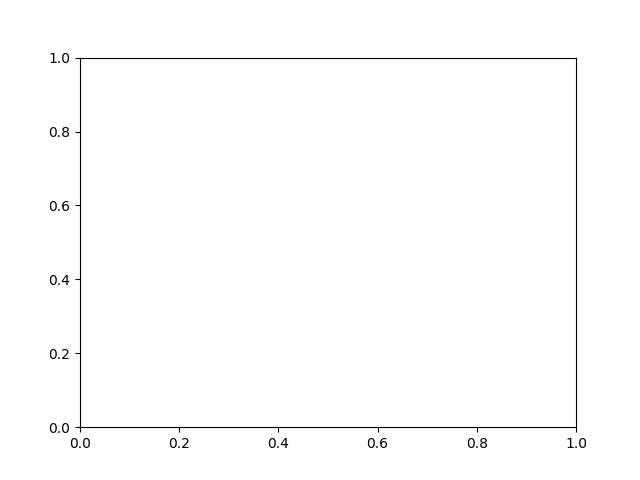

In [13]:
fig,ax = plt.subplots()